In [1]:
from Chemometrics.basic import pload,plot_ConfusionMatrix,build_clf,cal_pct
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,GroupShuffleSplit,StratifiedShuffleSplit
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.style.use('ggplot')

In [2]:
# representative sample, group statified split
data = pload('./地沟油红外数据及标签.p')
ir = data['IR']
desc = data['descriptions']
labels = desc['地沟油含量']
label_ = ~labels.isnull()
rseed = 1
cond1 = desc['备注'].isnull() #不是批发市场的
representatives = cond1
ir_n = ir[~representatives] # not representative
label_n = label_[~representatives] # not representative
ir = ir[representatives]
label = label_[representatives]
desc = desc[~desc.index.duplicated(keep='first')]

# train test split
# stratified group split
train,test= train_test_split(label.index.unique(),test_size=.25,random_state=2)
X_train,X_test = ir[ir.index.isin(train)],ir[ir.index.isin(test)]
y_train,y_test = label[label.index.isin(train)],label[label.index.isin(test)]

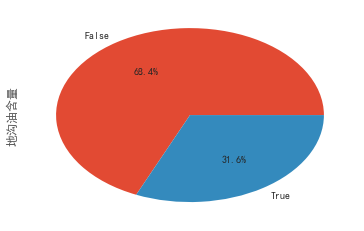

In [11]:
label.value_counts().plot.pie(autopct='%1.1f%%')

不做upsampling

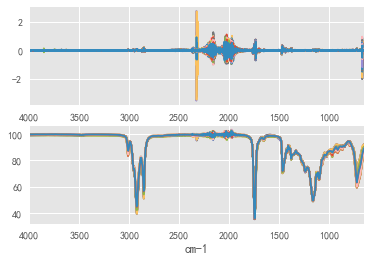

In [24]:
a1 = plt.subplot(2,1,1)
ir.T.diff().diff().plot(ax =a1,legend=False)
a2 = plt.subplot(2,1,2)
ir.T.plot(ax=a2,legend=False)

In [16]:
def firt_derivative(x):
    #一阶导数
    return x.diff()

In [30]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
param_grid = dict(preprocessing = [None,FunctionTransformer(firt_derivative)])
from sklearn.svm import SVC

In [36]:
estimators = [('preprocessing',FunctionTransformer(firt_derivative)),
       ('clf',SVC())]

In [37]:
pipe = Pipeline(estimators)

In [49]:
from sklearn.decomposition import PCA
param_grid = dict(preprocessing=[None, PCA(5), PCA(10)],
                    clf=[SVC()],
                    clf__C=[0.1, 10, 100])
grid = GridSearchCV(pipe, param_grid=param_grid)

In [48]:
grid.best_params_

{'clf': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 10,
 'preprocessing': PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)}